In [37]:
from sklearn import manifold

In [38]:
import math, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io

from mpl_toolkits.mplot3d import Axes3D

In [4]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [8]:
mat = scipy.io.loadmat('../DAT210x/Module4/Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [18]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
#     print("New Variances:\n", scaled.var())
#     print("New Describe:\n", scaled.describe())
    return scaled

In [51]:
df = scaleFeaturesDF(df)
pca=PCA(n_components=3, svd_solver='full')
pca.fit(df)
T=pca.transform(df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


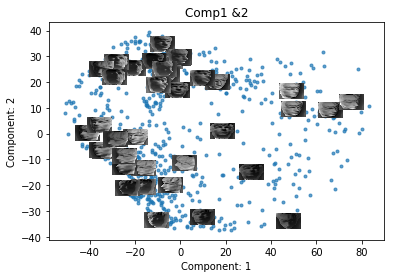

In [52]:
Plot2D(T,'Comp1 &2', 1,2)

In [58]:
from sklearn import manifold
iso=manifold.Isomap(n_neighbors=3, n_components=3)
iso.fit(df)
manifold = iso.transform(df)
manifold.shape

(698, 3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


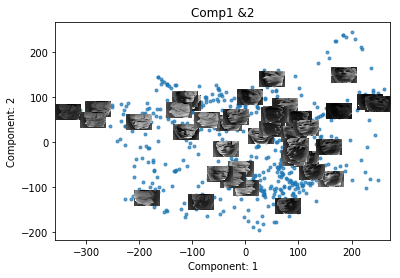

In [59]:
Plot2D(manifold,'Comp1 &2', 1,2)

In [34]:
from mpl_toolkits.mplot3d import Axes3D

In [35]:
df = scaleFeaturesDF(df)
pca=PCA(n_components=3, svd_solver='full')
pca.fit(df)
T=pca.transform(df)

In [39]:
iso=manifold.Isomap(n_neighbors=4, n_components=3)
iso.fit(df)
manifold = iso.transform(df)
manifold.shape

(698, 3)

In [47]:
manifold

array([[-118.07594514,   16.77743315,   38.32108027],
       [ 163.10995385,   95.28470084,    8.50409135],
       [-102.1192032 ,  -14.26794527,   27.72587793],
       ...,
       [ 302.64244729,   25.99873509,   72.53488331],
       [ 142.68830156,   65.48238659,  -84.89585402],
       [-105.27975106,    1.06636423, -161.66648617]])

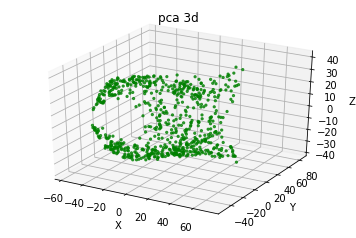

In [49]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_title('pca 3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(T[:,0], T[:,1], T[:,2], c='g', marker='.', alpha=.75)

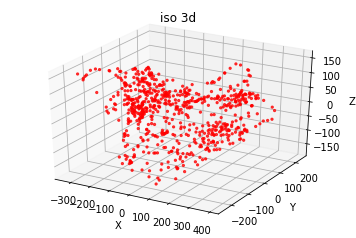

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_title('iso 3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(manifold[:,0], manifold[:,1], manifold[:,2], c='r', marker='.', alpha=.75)